In [1]:
#Hrudai Battini HW 1, Part 1 Aplied Machine Learning
import numpy as np
import seaborn as sns
import os
import pandas as pd
from sklearn import preprocessing
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


In [2]:
#Part 1 The Housing Prices

X = pd.read_csv("train.csv")
X_test = pd.read_csv("test.csv")
lenx = len(X)
df = pd.concat([X,X_test])


<AxesSubplot:>

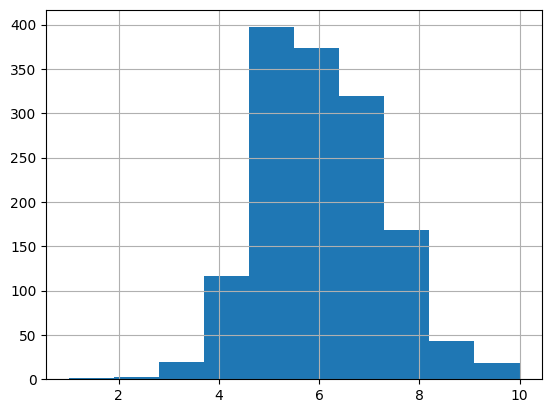

In [3]:
#2 
#OverallQuality:Continuous Feature
X.loc[:,'OverallQual'].hist()

<AxesSubplot:>

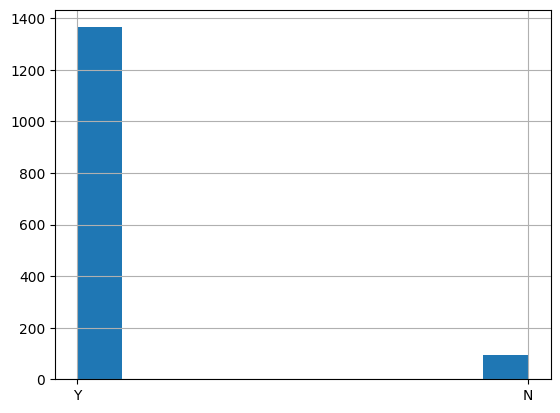

In [4]:
#2
#Central Air:Categorical Feature
X.loc[:,'CentralAir'].hist()

In [5]:
#3 Pre Processing Data 

#Columns that are to be removed, vals<100 
cols = ['Alley','PoolQC','MiscFeature']
hold = df.drop(cols,axis=1)
#One Hot Encoding the Categorical Variables in the dataset
df_Prep = pd.get_dummies(hold)
#Dealing with Missing Values via Interpolation
df_Prep = df_Prep.interpolate()
cols = df_Prep.columns
X_train = df_Prep.iloc[:lenx,:]
X_test = df_Prep.iloc[lenx:,:]
 

array([[<AxesSubplot:title={'center':'Ex'}>,
        <AxesSubplot:title={'center':'Fa'}>],
       [<AxesSubplot:title={'center':'Gd'}>,
        <AxesSubplot:title={'center':'Po'}>],
       [<AxesSubplot:title={'center':'TA'}>, <AxesSubplot:>]],
      dtype=object)

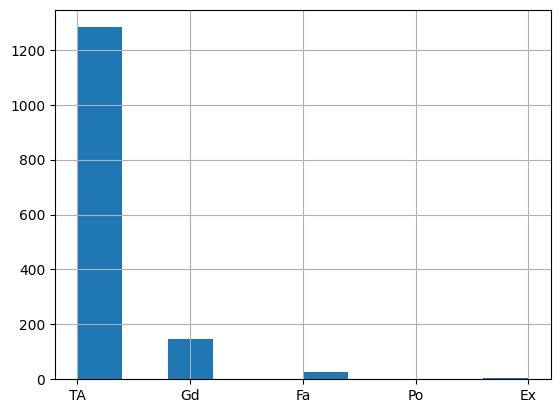

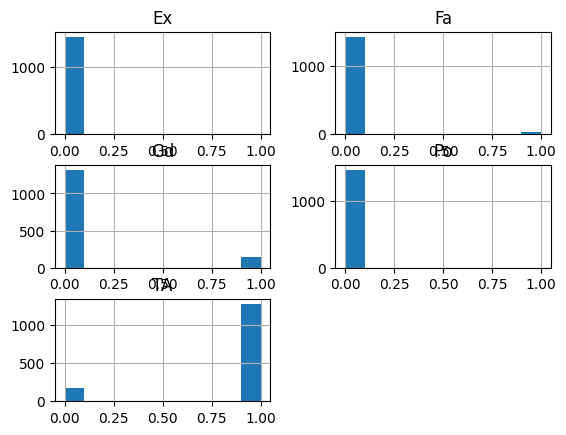

In [6]:
#4 One Hot Encoding Example
#Exterior Condition values from Housing Prices Dataframe
X_extCond = X.loc[:,'ExterCond']
X_extCond.loc[:].hist()
#OHE of Exterior Condition
ohe_extCond = pd.get_dummies(X_extCond)
ohe_extCond.loc[:].hist()

In [7]:
#Feature Selection
corrMat = X_train.corr()

df_salePrice = pd.DataFrame(corrMat.loc[:,"SalePrice"])
hc_cols = [col for col in corrMat.columns if corrMat['SalePrice'][col] < 0.25]
#Selected Columns based on their relevance to the cost 
cl = ["SalePrice"]
X_train_set = X_train.drop(hc_cols,axis=1)
X_train_set = X_train_set.drop(cl,axis=1) 
X_test_set = X_test.drop(hc_cols,axis=1)
X_test_set = X_test_set.drop(cl,axis=1)
X_test_set["one"] = 1

In [8]:
#5 OLS Implementation

#Training set Y_test
Y_train = pd.DataFrame(X_train["SalePrice"])
X_train_set['one'] = 1

#OLS
theta = np.linalg.inv(X_train_set.T.dot(X_train_set)).dot(X_train_set.T).dot(Y_train)

#Y Prediction
Y_train_hat = pd.DataFrame()
Y_train_hat['SalePrice'] = X_train_set.dot(theta)
#MSE
mse = 0.5*np.mean((Y_train-Y_train_hat)**2)


Y_train['Mean'] = np.mean(Y_train['SalePrice'])
r2 =1- np.sum((Y_train['SalePrice'] - Y_train_hat['SalePrice'])**2)/np.sum((Y_train['SalePrice'] - Y_train['Mean'])**2)


c:\Users\hruda\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [9]:
#6 Test Data Implementation 

#Y Prediction
Y_test_hat = pd.DataFrame()
Y_test_hat["Id"] = X_test.loc[:,"Id"]
Y_test_hat["SalePrice"] = X_test_set.dot(theta)
Y_test_hat.drop(Y_test_hat.filter(regex="Unname"),axis=1, inplace=True)

Y_test_hat.to_csv(path_or_buf="Yhattest.csv", sep =',',index=False)

